In [55]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp
import cmath

In [211]:
t = -1
N1 = 250
a = 1 #lattice constant
# onsite energies
Ea = Eb = 0

# lattice vectors
a1 = np.array([a*N1, 0])
ssh_lattice = pb.Lattice(a1=a1)
for n in range(0, N1):
    ssh_lattice.add_sublattices(
        (f'A{n}', np.array([n*a]), Ea), (f'B{n}', np.array([n*a+a/2]), Eb))

# nearest-neighbor hopping

In [212]:
for n in range(0, N1):
    #x = (n-N1/2)
    x = np.abs(n-N1/2) - N1/4

    delta = 0.2 * np.tanh(x)
    ssh_lattice.add_hoppings(
    ([0], f'A{n}', f'B{n}', t*(1+delta) ))
for n in range(0, N1-1):
    #x = (n-N1/2)
    x = np.abs(n+1/2-N1/2) - N1/4
    delta = 0.2 * np.tanh(x)
    ssh_lattice.add_hoppings(
    ([0], f'B{n}', f'A{n+1}', t*(1-delta)))

x = (N1/4+1/2)
delta = 0.2 * np.tanh(x)
ssh_lattice.add_hoppings(
    ([1], f'B{N1-1}', f'A0', t*(1-delta)))


In [213]:
#ssh_model = pb.Model(
#    ssh_lattice,
#)
ssh_model = pb.Model(
    ssh_lattice,
   # pb.translational_symmetry()
)

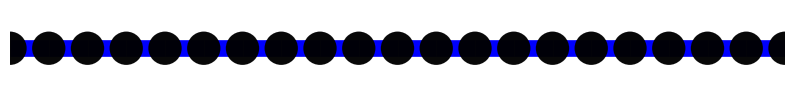

In [214]:
plt.figure(figsize=(10, 5))
ssh_model.plot(num_periods=5,
          hopping = {
  "width": 20, "color": "blue", "blend" : 1,
}, sites={"cmap":["black"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(0, 10)
plt.ylim(-0.5, 0.5);

In [215]:
solver = pb.solver.lapack(ssh_model)

In [217]:
anomalous_indices, = np.where((solver.eigenvalues < 0.1) & (solver.eigenvalues > -0.1))

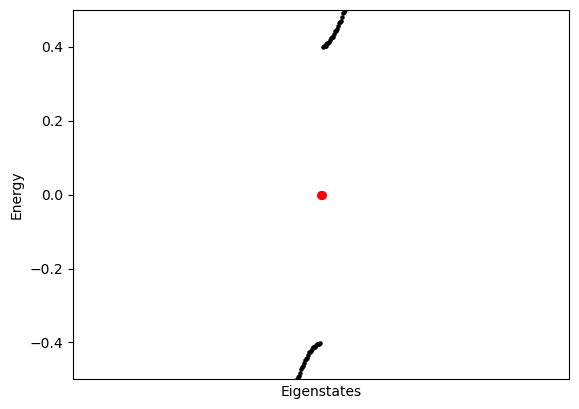

In [234]:
plt.scatter(range(0, N1*2), solver.eigenvalues, s=5, color="black")
plt.scatter(anomalous_indices, solver.eigenvalues[anomalous_indices], s=30, color="red")

plt.xlim(0, N1*2-1)
plt.ylim(-0.5, 0.5);
plt.xticks([]);
plt.xlabel("Eigenstates")
plt.ylabel("Energy");

In [231]:
b1, b2 = anomalous_indices
sublattice_sum_1 = ((np.abs(solver.eigenvectors[:, b1])**2)[0::2] + (np.abs(solver.eigenvectors[:, b1])**2)[1::2])
sublattice_sum_2 = ((np.abs(solver.eigenvectors[:, b2])**2)[0::2] + (np.abs(solver.eigenvectors[:, b2])**2)[1::2])

Text(0.5, 0, 'X')

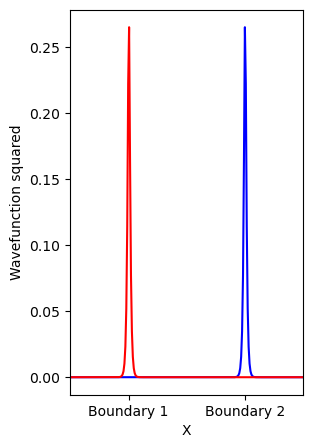

In [239]:
plt.figure(figsize=(3, 5))
plt.plot(sublattice_sum_1, color="blue")
plt.plot(sublattice_sum_2, color="red")
plt.xlim(0, N1-1);
plt.xticks([N1/4, 3*N1/4], ["Boundary 1", "Boundary 2"]);
plt.ylabel("Wavefunction squared")
plt.xlabel("X")